In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csvfile = pd.read_csv("Resources/directory.csv")

csvfile

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79


In [2]:
csvfile.columns

Index(['Brand', 'Store Number', 'Store Name', 'Ownership Type',
       'Street Address', 'City', 'State/Province', 'Country', 'Postcode',
       'Phone Number', 'Timezone', 'Longitude', 'Latitude'],
      dtype='object')

In [3]:

cleaned_df = csvfile[{"Store Name","Ownership Type","Street Address","City","State/Province","Country","Postcode"}]
cleaned_df.head()

,Country,Postcode,Street Address,State/Province,Store Name,Ownership Type,City
0,AD,AD500,"Av. Meritxell, 96",7,"Meritxell, 96",Licensed,Andorra la Vella
1,AE,NaN,"1 Street 69, Al Jarf",AJ,Ajman Drive Thru,Licensed,Ajman
2,AE,NaN,Sheikh Khalifa Bin Zayed St.,AJ,Dana Mall,Licensed,Ajman
3,AE,NaN,Al Salam Street,AZ,Twofour 54,Licensed,Abu Dhabi
4,AE,NaN,"Khaldiya Area, Abu Dhabi Island",AZ,Al Ain Tower,Licensed,Abu Dhabi


In [4]:
new_df = cleaned_df.loc[cleaned_df["Country"] == "US", :]
new_df

,Country,Postcode,Street Address,State/Province,Store Name,Ownership Type,City
11964,US,995042300,5600 Debarr Rd Ste 9,AK,Safeway-Anchorage #1809,Licensed,Anchorage
11965,US,995073444,1725 Abbott Rd,AK,Safeway-Anchorage #2628,Licensed,Anchorage
11966,US,995153596,1501 Huffman Rd,AK,Safeway - Anchorage #1813,Licensed,Anchorage
11967,US,99515,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",AK,100th & C St - Anchorage,Company Owned,Anchorage
11968,US,995152050,1005 E Dimond Blvd,AK,Old Seward & Diamond,Company Owned,Anchorage
...,...,...,...,...,...,...,...
25567,US,820723012,554 N 3rd St,WY,Safeway-Laramie #2466,Licensed,Laramie
25568,US,820705141,3112 E. Grand,WY,Ridley's - Laramie #1131,Licensed,Laramie
25569,US,82070,3021 Grand Ave,WY,Laramie - Grand & 30th,Company Owned,Laramie
25570,US,829015751,118 Westland Way,WY,I-80 & Dewar Dr-Rock Springs,Company Owned,Rock Springs


In [5]:
new_df['Zip_Code'] = new_df['Postcode'].where(new_df['Postcode'].str.len() == 5, 
                                               new_df['Postcode'].str[:5])

/Users/AnaLindaPenny/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [6]:
new_df

,Country,Postcode,Street Address,State/Province,Store Name,Ownership Type,City,Zip_Code
11964,US,995042300,5600 Debarr Rd Ste 9,AK,Safeway-Anchorage #1809,Licensed,Anchorage,99504
11965,US,995073444,1725 Abbott Rd,AK,Safeway-Anchorage #2628,Licensed,Anchorage,99507
11966,US,995153596,1501 Huffman Rd,AK,Safeway - Anchorage #1813,Licensed,Anchorage,99515
11967,US,99515,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",AK,100th & C St - Anchorage,Company Owned,Anchorage,99515
11968,US,995152050,1005 E Dimond Blvd,AK,Old Seward & Diamond,Company Owned,Anchorage,99515
...,...,...,...,...,...,...,...,...
25567,US,820723012,554 N 3rd St,WY,Safeway-Laramie #2466,Licensed,Laramie,82072
25568,US,820705141,3112 E. Grand,WY,Ridley's - Laramie #1131,Licensed,Laramie,82070
25569,US,82070,3021 Grand Ave,WY,Laramie - Grand & 30th,Company Owned,Laramie,82070
25570,US,829015751,118 Westland Way,WY,I-80 & Dewar Dr-Rock Springs,Company Owned,Rock Springs,82901


In [7]:
sb_df = new_df[{"Store Name","Ownership Type","Street Address","City","State/Province","Country","Zip_Code"}]

In [8]:
sb_df

,Country,Zip_Code,Street Address,State/Province,Store Name,Ownership Type,City
11964,US,99504,5600 Debarr Rd Ste 9,AK,Safeway-Anchorage #1809,Licensed,Anchorage
11965,US,99507,1725 Abbott Rd,AK,Safeway-Anchorage #2628,Licensed,Anchorage
11966,US,99515,1501 Huffman Rd,AK,Safeway - Anchorage #1813,Licensed,Anchorage
11967,US,99515,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",AK,100th & C St - Anchorage,Company Owned,Anchorage
11968,US,99515,1005 E Dimond Blvd,AK,Old Seward & Diamond,Company Owned,Anchorage
...,...,...,...,...,...,...,...
25567,US,82072,554 N 3rd St,WY,Safeway-Laramie #2466,Licensed,Laramie
25568,US,82070,3112 E. Grand,WY,Ridley's - Laramie #1131,Licensed,Laramie
25569,US,82070,3021 Grand Ave,WY,Laramie - Grand & 30th,Company Owned,Laramie
25570,US,82901,118 Westland Way,WY,I-80 & Dewar Dr-Rock Springs,Company Owned,Rock Springs


In [9]:
nc_sb_df = sb_df.loc[sb_df["State/Province"] == "NC", :]
nc_sb_df.head()

,Country,Zip_Code,Street Address,State/Province,Store Name,Ownership Type,City
19830,US,28315,110 Columbus Drive,NC,"Aberdeen, NC",Company Owned,Aberdeen
19831,US,27502,750 W Williams St,NC,Harris Teeter-Apex #58,Licensed,Apex
19832,US,27523,940 US Hwy 64,NC,Kroger-Apex #357,Licensed,Apex
19833,US,27502,1201 Beaver Creek Commons Dr,NC,Super Target Apex ST-1932,Licensed,Apex
19834,US,28704,15 McKenna Rd,NC,Target Asheville T-2011,Licensed,Arden


In [10]:
nc_sb_df

,Country,Zip_Code,Street Address,State/Province,Store Name,Ownership Type,City
19830,US,28315,110 Columbus Drive,NC,"Aberdeen, NC",Company Owned,Aberdeen
19831,US,27502,750 W Williams St,NC,Harris Teeter-Apex #58,Licensed,Apex
19832,US,27523,940 US Hwy 64,NC,Kroger-Apex #357,Licensed,Apex
19833,US,27502,1201 Beaver Creek Commons Dr,NC,Super Target Apex ST-1932,Licensed,Apex
19834,US,28704,15 McKenna Rd,NC,Target Asheville T-2011,Licensed,Arden
...,...,...,...,...,...,...,...
20163,US,27103,2015 Frontis Plaza Boulevard,NC,Hanes Mall Blvd.,Company Owned,Winston-Salem
20164,US,27103,"110 Oakwood Drive, Space U122, N/A",NC,Stratford Road,Company Owned,Winston-Salem
20165,US,27106,2898 Reynolda Road,NC,Reynolda Road,Company Owned,Winston-Salem
20166,US,27109,1834 Wake Forest Rd,NC,Wake Forest University Z. Smith Rey,Licensed,Winston-Salem


In [11]:
nc_zipcodes = pd.read_csv("nczipcodes.csv")
nc_zipcodes

,Zip_Code,City,State,County Name
0,28315,ABERDEEN,NC,MOORE
1,27006,ADVANCE,NC,DAVIE
2,27910,AHOSKIE,NC,HERTFORD
3,27201,ALAMANCE,NC,ALAMANCE
4,28001,ALBEMARLE,NC,STANLY
...,...,...,...,...
1041,27379,YANCEYVILLE,NC,CASWELL
1042,27596,YOUNGSVILLE,NC,FRANKLIN
1043,27597,ZEBULON,NC,WAKE
1044,28698,ZIONVILLE,NC,WATAUGA


In [12]:
nc_zipcodes.dtypes

Zip_Code        int64
City           object
State          object
County Name    object
dtype: object

In [13]:
nc_zipcodes['Zip_Code'] = nc_zipcodes['Zip_Code'].apply(str)

In [14]:
merge_df = pd.merge(nc_sb_df, nc_zipcodes, on="Zip_Code", how="inner")
merge_df

,Country,Zip_Code,Street Address,State/Province,Store Name,Ownership Type,City_x,City_y,State,County Name
0,US,28315,110 Columbus Drive,NC,"Aberdeen, NC",Company Owned,Aberdeen,ABERDEEN,NC,MOORE
1,US,27502,750 W Williams St,NC,Harris Teeter-Apex #58,Licensed,Apex,APEX,NC,WAKE
2,US,27502,1201 Beaver Creek Commons Dr,NC,Super Target Apex ST-1932,Licensed,Apex,APEX,NC,WAKE
3,US,27523,940 US Hwy 64,NC,Kroger-Apex #357,Licensed,Apex,APEX,NC,WAKE
4,US,28704,15 McKenna Rd,NC,Target Asheville T-2011,Licensed,Arden,ARDEN,NC,BUNCOMBE
...,...,...,...,...,...,...,...,...,...,...
333,US,27105,5420 University Pkwy,NC,Target Winston-Salem North T-1077,Licensed,Winston-Salem,WINSTON SALEM,NC,FORSYTH
334,US,27106,2835 Reynolda Rd,NC,Harris Teeter Winston Salem # 346,Licensed,Winston-Salem,WINSTON SALEM,NC,FORSYTH
335,US,27106,3327 Robinhood Road,NC,Mt. Tabor Place,Company Owned,Winston-Salem,WINSTON SALEM,NC,FORSYTH
336,US,27106,2898 Reynolda Road,NC,Reynolda Road,Company Owned,Winston-Salem,WINSTON SALEM,NC,FORSYTH


In [15]:
new_nc_sb_df = merge_df[{"Country","Store Name","Ownership Type",
                         "Street Address","City_y","State","Country","Zip_Code","County Name"}]
new_nc_sb_df

,Country,Zip_Code,County Name,Street Address,City_y,State,Store Name,Ownership Type
0,US,28315,MOORE,110 Columbus Drive,ABERDEEN,NC,"Aberdeen, NC",Company Owned
1,US,27502,WAKE,750 W Williams St,APEX,NC,Harris Teeter-Apex #58,Licensed
2,US,27502,WAKE,1201 Beaver Creek Commons Dr,APEX,NC,Super Target Apex ST-1932,Licensed
3,US,27523,WAKE,940 US Hwy 64,APEX,NC,Kroger-Apex #357,Licensed
4,US,28704,BUNCOMBE,15 McKenna Rd,ARDEN,NC,Target Asheville T-2011,Licensed
...,...,...,...,...,...,...,...,...
333,US,27105,FORSYTH,5420 University Pkwy,WINSTON SALEM,NC,Target Winston-Salem North T-1077,Licensed
334,US,27106,FORSYTH,2835 Reynolda Rd,WINSTON SALEM,NC,Harris Teeter Winston Salem # 346,Licensed
335,US,27106,FORSYTH,3327 Robinhood Road,WINSTON SALEM,NC,Mt. Tabor Place,Company Owned
336,US,27106,FORSYTH,2898 Reynolda Road,WINSTON SALEM,NC,Reynolda Road,Company Owned


In [16]:
sb_owner_counts = new_nc_sb_df["Ownership Type"].value_counts()
sb_owner_counts.head()

Licensed         186
Company Owned    152
Name: Ownership Type, dtype: int64

In [17]:
sb_zip_counts = new_nc_sb_df["Zip_Code"].value_counts()
sb_zip_counts

28208    10
28277    10
27103     8
27410     8
28027     7
         ..
28315     1
27949     1
28036     1
28732     1
28244     1
Name: Zip_Code, Length: 152, dtype: int64

In [18]:
sb_city_counts = new_nc_sb_df["City_y"].value_counts()
sb_city_counts

CHARLOTTE         61
RALEIGH           27
GREENSBORO        19
CARY              17
DURHAM            15
                  ..
LINCOLNTON         1
DAVIDSON           1
KINGS MOUNTAIN     1
SANFORD            1
CAMP LEJEUNE       1
Name: City_y, Length: 86, dtype: int64

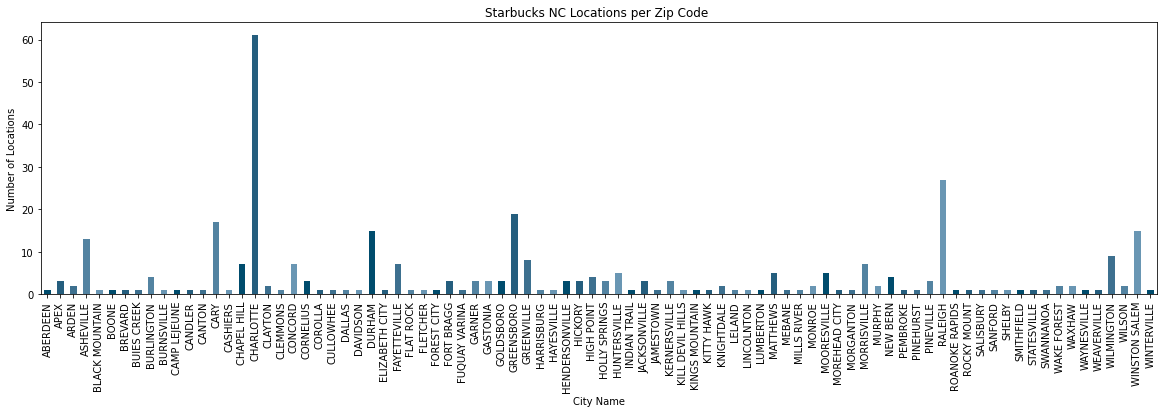

In [19]:
# Generate a bar plot showing the total number of Starbucks locations per Zip_Code using pandas
locations_per_City_y_data_points = new_nc_sb_df.groupby(['City_y']).count()['Zip_Code']
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3']

locations_per_City_y_data_points.plot(kind='bar', figsize=(20,5), color=colors)

plt.title('Starbucks NC Locations per Zip Code ')
plt.xlabel('City Name')
plt.ylabel('Number of Locations')

plt.show()

In [20]:
nc_county_count = new_nc_sb_df.groupby(["County Name"]).count()["Zip_Code"]
nc_county_count

County Name
ALAMANCE         5
BRUNSWICK        1
BUNCOMBE        19
BURKE            1
CABARRUS         8
CARTERET         1
CATAWBA          3
CHEROKEE         2
CLAY             1
CLEVELAND        2
CRAVEN           4
CUMBERLAND      10
CURRITUCK        1
DARE             2
DURHAM          15
FORSYTH         19
GASTON           4
GUILFORD        24
HALIFAX          1
HARNETT          1
HAYWOOD          2
HENDERSON        6
IREDELL          6
JACKSON          2
JOHNSTON         3
LEE              1
LINCOLN          1
MECKLENBURG     76
MOORE            2
NASH             1
NEW HANOVER      9
ONSLOW           4
ORANGE           7
PASQUOTANK       1
PITT             9
ROBESON          2
ROWAN            1
RUTHERFORD       1
TRANSYLVANIA     1
UNION            7
WAKE            65
WATAUGA          1
WAYNE            3
WILSON           2
YANCEY           1
Name: Zip_Code, dtype: int64

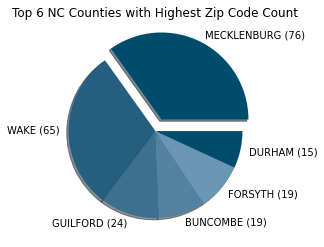

In [77]:
# Generate a pie plot showing the Top 6 Counties with highest Zip Codes count using pyplot
mylabels = ["MECKLENBURG (76)",
            "WAKE (65)", 
            "GUILFORD (24)", 
            "BUNCOMBE (19)", 
            "FORSYTH (19)",
            "DURHAM (15)"
]

myexplode = [0.15, 0, 0, 0, 0, 0]
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3']

y = np.array([76, 65, 24, 19, 19, 15])

plt.pie(y, labels=mylabels, explode=myexplode, colors=colors, shadow=True)
plt.title('Top 6 NC Counties with Highest Zip Code Count')
plt.show()

In [21]:
nc_countygroup = new_nc_sb_df.groupby(["County Name"])
nc_countygroup.head()

,Country,Zip_Code,County Name,Street Address,City_y,State,Store Name,Ownership Type
0,US,28315,MOORE,110 Columbus Drive,ABERDEEN,NC,"Aberdeen, NC",Company Owned
1,US,27502,WAKE,750 W Williams St,APEX,NC,Harris Teeter-Apex #58,Licensed
2,US,27502,WAKE,1201 Beaver Creek Commons Dr,APEX,NC,Super Target Apex ST-1932,Licensed
3,US,27523,WAKE,940 US Hwy 64,APEX,NC,Kroger-Apex #357,Licensed
4,US,28704,BUNCOMBE,15 McKenna Rd,ARDEN,NC,Target Asheville T-2011,Licensed
...,...,...,...,...,...,...,...,...
315,US,28403,NEW HANOVER,1940 Eastwood Rd,WILMINGTON,NC,Harris Teeter-Wilmington # 301,Licensed
316,US,28403,NEW HANOVER,"311 S College Dr, Ste 100",WILMINGTON,NC,S College Dr & New Centre Dr,Company Owned
321,US,27896,WILSON,"3401 Raleigh Rd, Suite 101",WILSON,NC,"Wilson, NC",Company Owned
322,US,27896,WILSON,3401 Raleigh Rd Pkwy W,WILSON,NC,Target Wilson T-2168,Licensed


In [22]:
new_nc_sb_df.dtypes

Country           object
Zip_Code          object
County Name       object
Street Address    object
City_y            object
State             object
Store Name        object
Ownership Type    object
dtype: object

In [23]:
comp_own_df = new_nc_sb_df.loc[new_nc_sb_df["Ownership Type"] == "Company Owned", :]
comp_own_df.head()

,Country,Zip_Code,County Name,Street Address,City_y,State,Store Name,Ownership Type
0,US,28315,MOORE,110 Columbus Drive,ABERDEEN,NC,"Aberdeen, NC",Company Owned
9,US,28805,BUNCOMBE,3 S Tunnel Road,ASHEVILLE,NC,Asheville Mall,Company Owned
10,US,28803,BUNCOMBE,"26 Carl Alwin Place, 10",ASHEVILLE,NC,Long Shoals Rd & I-26,Company Owned
12,US,28803,BUNCOMBE,"40 All Souls Crescent Street, Biltmore Village...",ASHEVILLE,NC,Biltmore Village,Company Owned
13,US,28803,BUNCOMBE,1378 Hendersonville Road,ASHEVILLE,NC,Parkway Centre,Company Owned


In [24]:
lic_own_df = new_nc_sb_df.loc[new_nc_sb_df["Ownership Type"] == "Licensed", :]
lic_own_df.head()

,Country,Zip_Code,County Name,Street Address,City_y,State,Store Name,Ownership Type
1,US,27502,WAKE,750 W Williams St,APEX,NC,Harris Teeter-Apex #58,Licensed
2,US,27502,WAKE,1201 Beaver Creek Commons Dr,APEX,NC,Super Target Apex ST-1932,Licensed
3,US,27523,WAKE,940 US Hwy 64,APEX,NC,Kroger-Apex #357,Licensed
4,US,28704,BUNCOMBE,15 McKenna Rd,ARDEN,NC,Target Asheville T-2011,Licensed
5,US,28704,BUNCOMBE,301 Long Shoals Rd,ARDEN,NC,Ingles-Arden #130,Licensed


In [26]:
comp_own_df["City_y"].value_counts()

CHARLOTTE         29
RALEIGH           20
WINSTON SALEM      9
GREENSBORO         9
DURHAM             8
CARY               8
ASHEVILLE          6
CONCORD            4
WILMINGTON         4
GREENVILLE         3
PINEVILLE          3
FAYETTEVILLE       3
HUNTERSVILLE       3
HICKORY            2
BURLINGTON         2
JACKSONVILLE       2
MOORESVILLE        2
HIGH POINT         2
MORRISVILLE        2
GOLDSBORO          2
CHAPEL HILL        2
SMITHFIELD         1
HENDERSONVILLE     1
HOLLY SPRINGS      1
MOREHEAD CITY      1
ROANOKE RAPIDS     1
LUMBERTON          1
KNIGHTDALE         1
MONROE             1
KITTY HAWK         1
FUQUAY VARINA      1
CLEMMONS           1
INDIAN TRAIL       1
KERNERSVILLE       1
MATTHEWS           1
MEBANE             1
ABERDEEN           1
GARNER             1
WILSON             1
CORNELIUS          1
NEW BERN           1
WAXHAW             1
SANFORD            1
CLAYTON            1
WINTERVILLE        1
STATESVILLE        1
SALISBURY          1
GASTONIA     

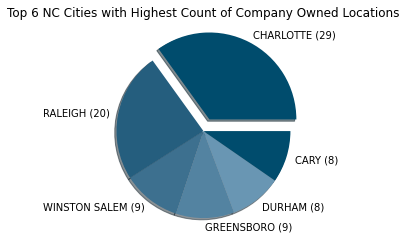

In [72]:
# Generate a pie plot showing the Top 6 NC Cities with highest count of Company Owned locations
mylabels = ["CHARLOTTE (29)",
            "RALEIGH (20)", 
            "WINSTON SALEM (9)", 
            "GREENSBORO (9)", 
            "DURHAM (8)",
            "CARY (8)"
]

myexplode = [0.15, 0, 0, 0, 0, 0]
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3']

y = np.array([29, 20, 9, 9, 8, 8])

plt.pie(y, labels=mylabels, explode=myexplode, colors=colors, shadow=True)
plt.title('Top 6 NC Cities with Highest Count of Company Owned Locations')
plt.show()

In [27]:
lic_own_df["City_y"].value_counts()

CHARLOTTE         32
GREENSBORO        10
CARY               9
DURHAM             7
RALEIGH            7
                  ..
LINCOLNTON         1
LELAND             1
DAVIDSON           1
KINGS MOUNTAIN     1
CAMP LEJEUNE       1
Name: City_y, Length: 71, dtype: int64

In [28]:
comp_own_df["County Name"].value_counts()

MECKLENBURG    37
WAKE           34
GUILFORD       11
FORSYTH        11
DURHAM          8
BUNCOMBE        6
CABARRUS        4
NEW HANOVER     4
PITT            4
ALAMANCE        3
UNION           3
CUMBERLAND      3
IREDELL         3
CATAWBA         2
ORANGE          2
ONSLOW          2
JOHNSTON        2
WAYNE           2
CRAVEN          1
DARE            1
GASTON          1
LEE             1
HENDERSON       1
ROBESON         1
MOORE           1
ROWAN           1
HALIFAX         1
WILSON          1
CARTERET        1
Name: County Name, dtype: int64

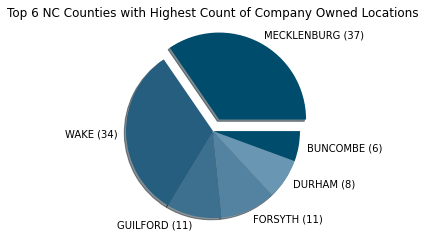

In [74]:
# Generate a pie plot showing the Top 6 NC Counties with highest count of Company Owned locations
mylabels = ["MECKLENBURG (37)",
            "WAKE (34)", 
            "GUILFORD (11)", 
            "FORSYTH (11)", 
            "DURHAM (8)",
            "BUNCOMBE (6)"
]

myexplode = [0.15, 0, 0, 0, 0, 0]
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3']

y = np.array([37,34, 11, 11, 8, 6])

plt.pie(y, labels=mylabels, explode=myexplode, colors=colors, shadow=True)
plt.title('Top 6 NC Counties with Highest Count of Company Owned Locations')
plt.show()

In [29]:
lic_own_df["County Name"].value_counts()

MECKLENBURG     39
WAKE            31
BUNCOMBE        13
GUILFORD        13
FORSYTH          8
CUMBERLAND       7
DURHAM           7
NEW HANOVER      5
PITT             5
HENDERSON        5
ORANGE           5
CABARRUS         4
UNION            4
CRAVEN           3
GASTON           3
IREDELL          3
ONSLOW           2
CLEVELAND        2
CHEROKEE         2
HAYWOOD          2
JACKSON          2
ALAMANCE         2
MOORE            1
DARE             1
CLAY             1
BURKE            1
LINCOLN          1
YANCEY           1
WATAUGA          1
WAYNE            1
CURRITUCK        1
ROBESON          1
NASH             1
HARNETT          1
RUTHERFORD       1
PASQUOTANK       1
BRUNSWICK        1
TRANSYLVANIA     1
WILSON           1
JOHNSTON         1
CATAWBA          1
Name: County Name, dtype: int64

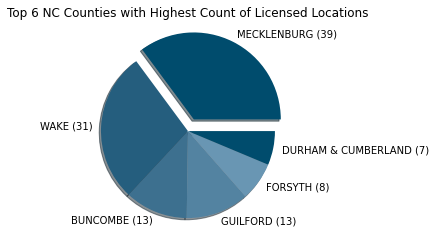

In [78]:
# Generate a pie plot showing the Top 6 NC Counties with highest count of Licensed locations
mylabels = ["MECKLENBURG (39)",
            "WAKE (31)", 
            "BUNCOMBE (13)", 
            "GUILFORD (13)", 
            "FORSYTH (8)",
            "DURHAM & CUMBERLAND (7)"
]

myexplode = [0.15, 0, 0, 0, 0, 0]
colors = ['#004c6d', '#255e7e', '#3d708f', '#5383a1', '#6996b3']

y = np.array([39,31, 13, 13, 8, 7])

plt.pie(y, labels=mylabels, explode=myexplode, colors=colors, shadow=True)
plt.title('Top 6 NC Counties with Highest Count of Licensed Locations')
plt.show()

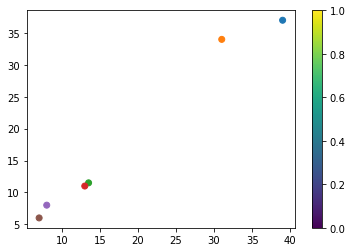

In [93]:
# Generate a scatter plot to compare the Top 6 NC Counties with highest count of Company Owned vs. Licensed locations
company_owned_locations = ["MECKLENBURG (37)",
            "WAKE (34)", 
            "GUILFORD (11.5)", 
            "FORSYTH (11)", 
            "DURHAM (8)",
            "BUNCOMBE (6)"
]

licensed_locations = ["MECKLENBURG (39)",
            "WAKE (31)", 
            "BUNCOMBE (13.5)", 
            "GUILFORD (13)", 
            "FORSYTH (8)",
            "DURHAM & CUMBERLAND (7)"
]

y = np.array([37, 34, 11.5, 11, 8, 6])
x = np.array([39, 31, 13.5, 13, 8, 7])

colors = np.array(["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"])

plt.scatter(x, y, c=colors, cmap='viridis')
plt.colorbar()
plt.show()